## Flight Price Prediction

## 1. Importar modulos necesarios

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Data_Train.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 2. Creacion de funciones de transformación
Hacemos todas las funciones necesarias para poder tener las columnas con valores numericos o que nos puedan ser utiles posteriormente en el estudio

In [4]:
def transform_hours(c):
    if ' ' in c:
        hours=c.split(' ')[0][:-1]
        minutes=c.split(' ')[1][:-1]
        return int(hours)*60+int(minutes)
    else:
        hours=c[:-1]
        return int(hours)*60      

In [5]:
def transform_route(c):
    return str(c).split('→')

In [6]:
def transform_stops(c):
    return len(c)-2

In [7]:
def extra_days(r):
    if any(c.isalpha() for c in r)==0:
        return 0
    else:
        return 1

In [8]:
spring = [3, 4, 5]
summer = [6, 7, 8]
fall = [9, 10, 11]
def season(c):
        if c in spring:
            return 'spring'  
        elif c in summer:
            return 'summer' 
        elif c in fall:
            return 'fall' 
        else:
            return 'winter'

In [9]:
morning = range(8, 16)
afternoon = range(16, 24)
night = range(0, 8)
def timeday(c):
        if int(c[0:2]) in morning:
            return 'morning'  
        elif int(c[0:2]) in afternoon:
            return 'afternoon' 
        elif int(c[0:2]) in night:
            return 'night' 

## 3. Aplicación de funciones 
Aplicamos todas las funciones a las columnas necesarias

In [10]:
data['Minutes'] = list(map(transform_hours, data['Duration']))

In [11]:
data['Extra_Day'] = list(map(extra_days, data['Arrival_Time']))

In [12]:
data['Route'] = list(map(transform_route, data['Route']))

In [13]:
data["Code_Source"] = data['Route'].apply(lambda x: x[0].strip())

In [14]:
data['Code_Destination'] = data['Route'].apply(lambda x: x[-1].strip())

In [15]:
data['Nº_Stops'] = list(map(transform_stops, data['Route']))

In [16]:
df2=data["Date_of_Journey"].str.split('/', expand=True)
df2.columns=['Day','Month','Year']
day=list(df2['Day'])
month=list(df2['Month'])
year=list(df2['Year'])
data['Day']=day
data['Month']=month
data['Month'] = data['Month'].astype(int)
data['Year']=year

In [17]:
data['Season'] = data['Month'].apply(season)

In [18]:
data['Time_Period'] = data['Dep_Time'].apply(timeday)

In [19]:

season=[]

def transform_season(c):
    for c in range(len(month)):
        if any(x == spring for x in Month):
            season.append('spring') # spring 
        elif any(x == summer for x in Month):
            season.append('summer') # summer
        elif any(x == fall for x in Month):
            season.append('fall') # fall
        else:
            season.append('winter')


In [20]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Minutes,Extra_Day,Code_Source,Code_Destination,Nº_Stops,Day,Month,Year,Season,Time_Period
0,IndiGo,24/03/2019,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,170,1,BLR,DEL,0,24,3,2019,spring,afternoon
1,Air India,1/05/2019,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,...,445,0,CCU,BLR,2,1,5,2019,spring,night
2,Jet Airways,9/06/2019,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,...,1140,1,DEL,COK,2,9,6,2019,summer,morning
3,IndiGo,12/05/2019,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,...,325,0,CCU,BLR,1,12,5,2019,spring,afternoon
4,IndiGo,01/03/2019,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,...,285,0,BLR,DEL,1,01,3,2019,spring,afternoon


## 4. Previsualización de datos
Examinamos las frecuencias de aeropuertos, ciudad de salida y destino más predominantes para conocer mejor los datos

Text(0.5, 1.0, 'Frequency of Destination City')

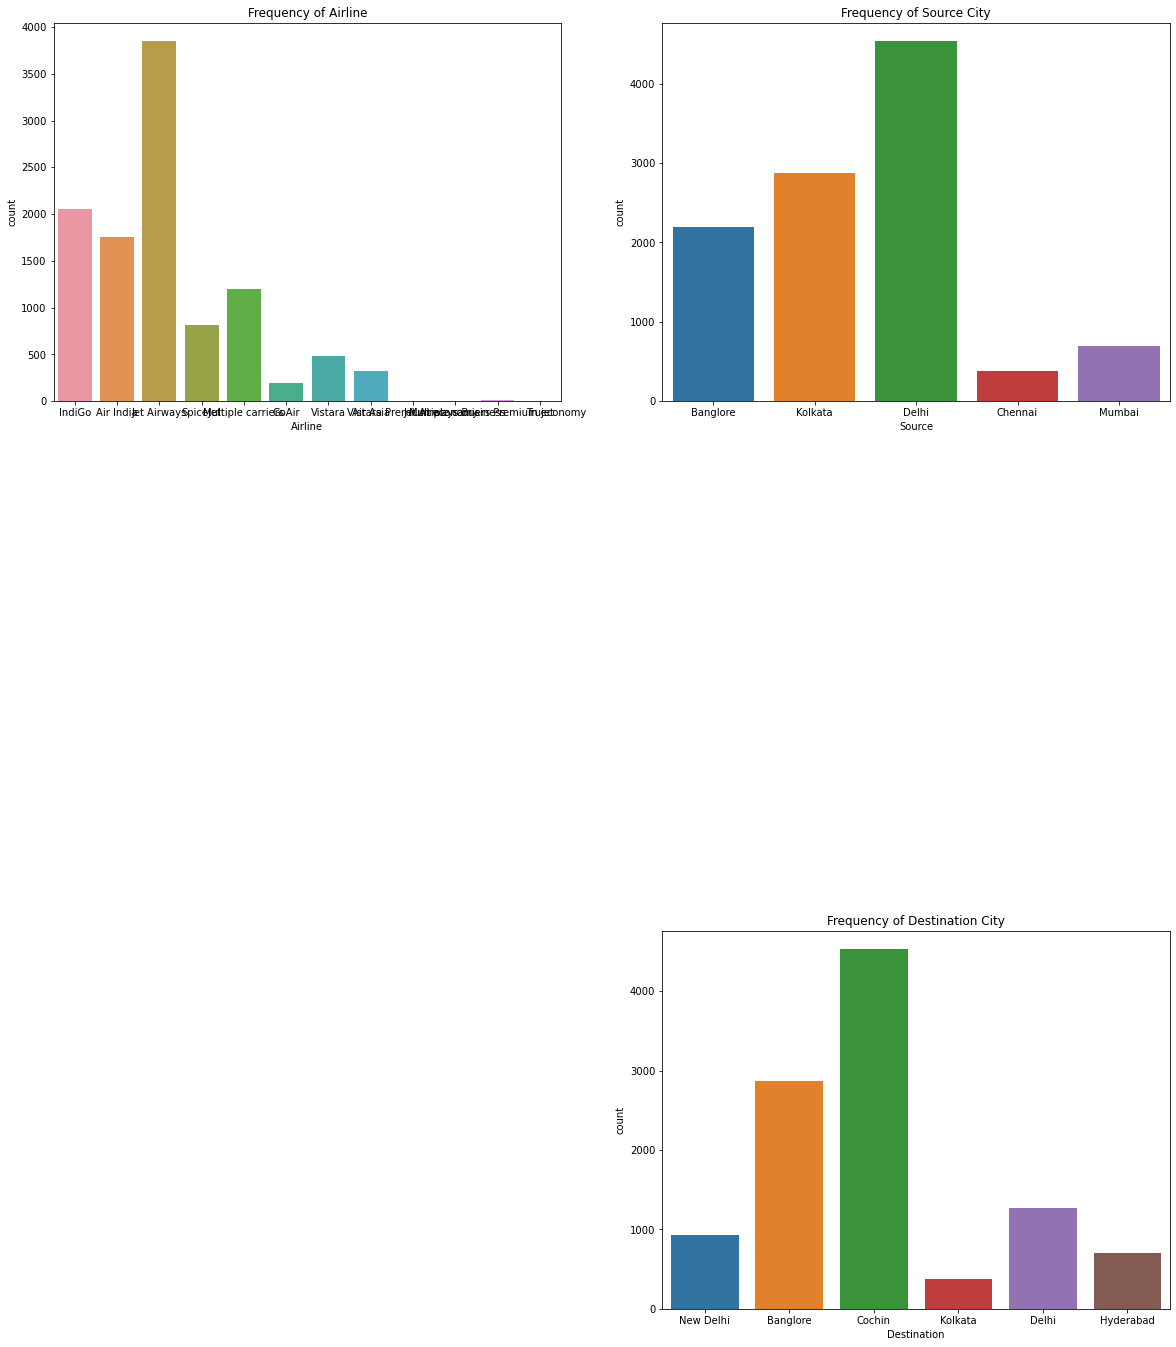

In [21]:
plt.figure(figsize=(20,32))

plt.subplot(4, 2, 1)
sns.countplot(x=data["Airline"], data=data)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=data["Source"], data=data)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 6)
sns.countplot(x=data["Destination"], data=data)
plt.title("Frequency of Destination City")

Miramos grafico de correlacion

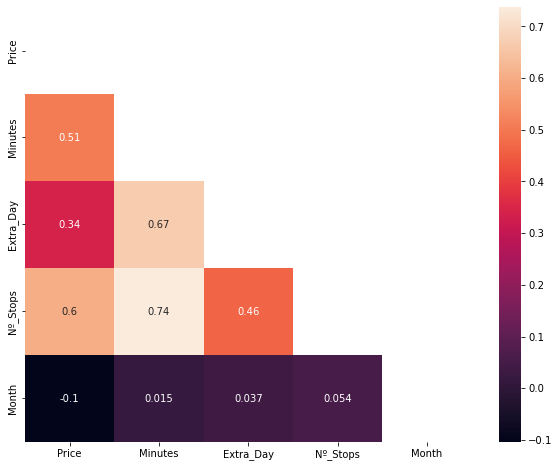

In [22]:
import seaborn as sns
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [23]:
dataclean=data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Code_Source','Code_Destination','Day','Month','Year'],axis=1)
data.to_excel(r'C:\Users\PU535KG\OneDrive - EY\Documents\ironhack\labs\Final_Project\Test_set.xlsx', index=False)

In [24]:
dataclean.head()

,Airline,Source,Destination,Price,Minutes,Extra_Day,Nº_Stops,Season,Time_Period
0,IndiGo,Banglore,New Delhi,3897,170,1,0,spring,afternoon
1,Air India,Kolkata,Banglore,7662,445,0,2,spring,night
2,Jet Airways,Delhi,Cochin,13882,1140,1,2,summer,morning
3,IndiGo,Kolkata,Banglore,6218,325,0,1,spring,afternoon
4,IndiGo,Banglore,New Delhi,13302,285,0,1,spring,afternoon


## 5. Clasificación númerica y categorica
Dividimos los datos en categoricos y numericos

In [46]:
catdata = dataclean.drop(['Price','Minutes','Extra_Day','Nº_Stops'],axis=1)
numdata = dataclean.drop(['Airline','Source','Destination','Season','Time_Period','Extra_Day','Nº_Stops'],axis=1)
numdata.columns

Index(['Price', 'Minutes', 'Class'], dtype='object')

In [26]:
def convcat(df):
    convcatdata = pd.get_dummies(catdata, columns=catdata.columns, drop_first=True)
    return convcatdata
convcatdata = convcat(catdata)
convcatdata.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Season_summer,Time_Period_morning,Time_Period_night
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 6. Preproceso de los datos
Aplicamos el StandardScaler en el preproceso de los datos

In [27]:
from sklearn.preprocessing import StandardScaler
for c in numdata.columns[0:-1]:
    numdata[c]=StandardScaler().fit_transform(numdata[c].values.reshape(-1, 1))
numdata.head()

,Price,Minutes
0,-1.125548,170
1,-0.309048,445
2,1.039858,1140
3,-0.622202,325
4,0.914076,285


In [28]:
df = pd.concat([numdata, convcatdata], axis = 1)

In [29]:
df.head()

,Price,Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Season_summer,Time_Period_morning,Time_Period_night
0,-1.125548,170,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.309048,445,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.039858,1140,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,-0.622202,325,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.914076,285,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

Dividimos los datos entre train y test con un 20% de test

In [31]:
from sklearn.model_selection import train_test_split as tts

x = df.drop(columns = ['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)
print(x.shape)
print(y.shape)

(10683, 24)
(10683,)


## 7. Obtención de resultados
Aplicamos todos los modelos regresivos y miramos el r2

In [32]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

elastic=ElasticNet()
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train)
y_pred_linreg=linreg.predict(X_test)

from xgboost import XGBRegressor as XGBR
xgbr=XGBR()
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

from lightgbm import LGBMRegressor as LGBMR
lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)
y_pred_lgbmr = lgbmr.predict(X_test)

models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]
for i in range(len(models)):
    train_score=models[i].score(X_train, y_train)
    test_score=models[i].score(X_test, y_test)
    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

C:\Users\PU535KG\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\PU535KG\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model: linreg, train R2: 0.5520233119796322 -- test R2: 0.5481489456572718
Model: lasso, train R2: 0.2585215584858186 -- test R2: 0.24844172170023515
Model: ridge, train R2: 0.5499316370777538 -- test R2: 0.5475929944890309
Model: elastic, train R2: 0.25852447474946083 -- test R2: 0.2484111010255583
Model: rfr, train R2: 0.7726918239740316 -- test R2: 0.5617054707947438
Model: xgbr, train R2: 0.7500912261151994 -- test R2: 0.6083588766100247
Model: lgbmr, train R2: 0.6528853018872642 -- test R2: 0.574869761390862


In [33]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train)
    test_mae=mae(preds[i], y_test)
    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 0.46393674112317423 -- test MAE: 0.471018193873609
Model: lasso, train MAE: 0.6153953195110758 -- test MAE: 0.6244141995791145
Model: ridge, train MAE: 0.46458542359456884 -- test MAE: 0.4716718678604951
Model: elastic, train MAE: 0.6152976628351665 -- test MAE: 0.6243448978394204
Model: rfr, train MAE: 0.28603756659887003 -- test MAE: 0.37865532615193925
Model: xgbr, train MAE: 0.31360356891791336 -- test MAE: 0.37972650978504563
Model: lgbmr, train MAE: 0.36601294732150613 -- test MAE: 0.40206094296656686


# 8. First iteration
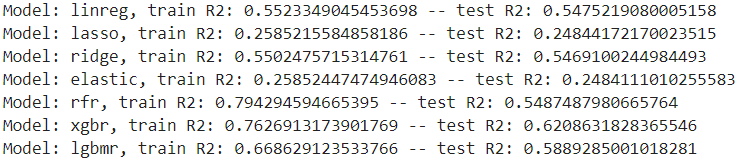


Intentamos mejorar el modelo añadiendo la columna Class que se crea a continuacion

In [34]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [35]:
adinfo = ['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 
       'Red-eye flight', '2 Long layover']
def business(c):
        if c in adinfo:
            return 'Economy class'  
        else:
            pass 
data['Class'] = list(map(business, data['Additional_Info']))

In [36]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Extra_Day,Code_Source,Code_Destination,Nº_Stops,Day,Month,Year,Season,Time_Period,Class
0,IndiGo,24/03/2019,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,1,BLR,DEL,0,24,3,2019,spring,afternoon,Economy class
1,Air India,1/05/2019,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,...,0,CCU,BLR,2,1,5,2019,spring,night,Economy class
2,Jet Airways,9/06/2019,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,...,1,DEL,COK,2,9,6,2019,summer,morning,Economy class
3,IndiGo,12/05/2019,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,...,0,CCU,BLR,1,12,5,2019,spring,afternoon,Economy class
4,IndiGo,01/03/2019,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,...,0,BLR,DEL,1,01,3,2019,spring,afternoon,Economy class


In [37]:
dataclean=data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Code_Source','Code_Destination','Day','Month','Year'],axis=1)
dataclean.to_excel(r'C:\Users\PU535KG\OneDrive - EY\Documents\ironhack\labs\Final_Project\Business.xlsx', index=False)

In [38]:
catdata = dataclean.drop(['Price','Minutes'],axis=1)
numdata = dataclean.drop(['Airline','Source','Destination','Season','Time_Period','Extra_Day','Nº_Stops','Class'],axis=1)

In [39]:
def convcat(df):
    convcatdata = pd.get_dummies(catdata, columns=catdata.columns, drop_first=True)
    return convcatdata
convcatdata = convcat(catdata)

In [40]:
from sklearn.preprocessing import StandardScaler
for c in numdata.columns[0:-1]:
    numdata[c]=StandardScaler().fit_transform(numdata[c].values.reshape(-1, 1))
numdata.head()

,Price,Minutes
0,-1.125548,170
1,-0.309048,445
2,1.039858,1140
3,-0.622202,325
4,0.914076,285


In [41]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [42]:
from sklearn.model_selection import train_test_split as tts

x = df.drop(columns = ['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)
print(x.shape)
print(y.shape)

(10683, 24)
(10683,)


## 9. Second Iteration

In [43]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

elastic=ElasticNet()
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train)
y_pred_linreg=linreg.predict(X_test)

from xgboost import XGBRegressor as XGBR
xgbr=XGBR()
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

from lightgbm import LGBMRegressor as LGBMR
lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)
y_pred_lgbmr = lgbmr.predict(X_test)

models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]
for i in range(len(models)):
    train_score=models[i].score(X_train, y_train)
    test_score=models[i].score(X_test, y_test)
    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

C:\Users\PU535KG\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model: linreg, train R2: 0.5520233119796322 -- test R2: 0.5481489456572718
Model: lasso, train R2: 0.2585215584858186 -- test R2: 0.24844172170023515
Model: ridge, train R2: 0.5499316370777538 -- test R2: 0.5475929944890309
Model: elastic, train R2: 0.25852447474946083 -- test R2: 0.2484111010255583
Model: rfr, train R2: 0.7728821795163496 -- test R2: 0.5530011973245674
Model: xgbr, train R2: 0.7500912261151994 -- test R2: 0.6083588766100247
Model: lgbmr, train R2: 0.6528853018872642 -- test R2: 0.574869761390862


In [44]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train)
    test_mae=mae(preds[i], y_test)
    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 0.46393674112317423 -- test MAE: 0.471018193873609
Model: lasso, train MAE: 0.6153953195110758 -- test MAE: 0.6244141995791145
Model: ridge, train MAE: 0.46458542359456884 -- test MAE: 0.4716718678604951
Model: elastic, train MAE: 0.6152976628351665 -- test MAE: 0.6243448978394204
Model: rfr, train MAE: 0.2858068495970427 -- test MAE: 0.37895138058892275
Model: xgbr, train MAE: 0.31360356891791336 -- test MAE: 0.37972650978504563
Model: lgbmr, train MAE: 0.36601294732150613 -- test MAE: 0.40206094296656686


In [45]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)